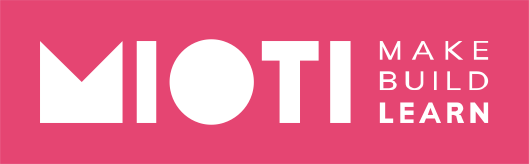
<center style="color:#888">Estadística para Data Science<br/>Asignatura Estadística</center>

# Ejercicio Ticket

Datos:
>> Nombre Equipo/Grupo:

>> Miembros:


# Contexto del Problema
Dado el fichero "ticket.xlsx" correspondiente a los ticket gestionados por una empresa de software.
Dicho fichero contiene los ticket atendidos y desglosados por:
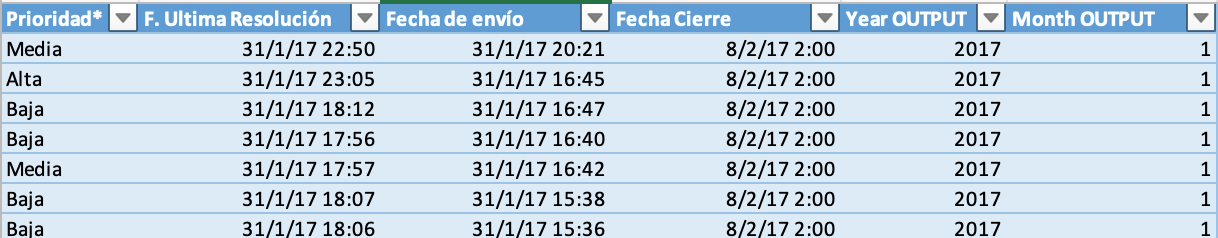

donde:
- **Prioridad**: Críticia, Atla, Media y Baja
- **F. Última Resolución**: indica la fecha y hora, en la que la empresa de servicio da por solucionado/resuleto el ticket
- **Fecha Envio**: refleja la fecha y hora de entrada del ticket al sistema
- **Fecha de Cierre**: es la fecha y hora en la que el ticket pasa a la BBDD hitórica de tickect

La empresa tiene contratados los siguientes Acuerdos de Nivel de Servicio (ANS) de resolución de ticket:
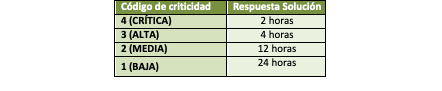
Siendo:
- Código de Criticidad: la coluna Prioridad
- Respuesta de solució: es la diferencia entre Fecha de Envío y F. Última Resolución


Los ANS firmados son los siguientes, que son medidos cada mes y por cada tipo de prioridad de tickect la compañia indica el alcance o nivel de servicio al respecto.
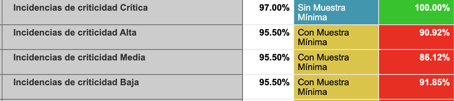

Si no hay muestra mínima, el indicador correspondiente no se mide ese mes. Siendo este el criterio de muestra mínima:
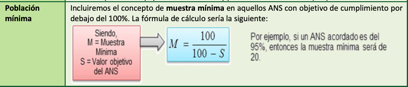
Es decir, la muestra mínima será de:
- 33 para Críticas
- 22 para las restantes

# Se solicita ....
En este contexto y con el histórico de los datos, nos plateamos las siguientes preguntas:

- Cual es la media de cumplimiento por cada una de las Prioridades
- Queremos saber, para la renovación del contrato subyacente, el nivel de servicio que esta Empresa puede dar, para lo que se solicitan sendos intervalos de confianza (por Prioridad) al 95 y 99%
- ¿Merece la pena seguir trabajando con ella, en función de los acuerdos que deseamos?

**Notas**: 

Es muy conveniente un estudio estadístico que os describan los datos.
Es necesario, que se calculen por cada ticket/incidencia si cumple o no con el ANS
Es necesario tener por cada mes el grado de cumplimiento (medición final)
Una vez agrupados así los datos, proceder al cálculo de los intervalos de confianza.




In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
#import modin.pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
#import pandas_profiling
data_xls = pd.read_excel('Ticket.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('ticket.csv', encoding='utf-8', index=False)
df = pd.read_csv('ticket.csv')

In [2]:
df.head() 
df['Prioridad*'].value_counts()

Baja       212985
Media       70310
Alta        26726
Crítica      1608
Name: Prioridad*, dtype: int64

In [10]:
# Convert some columns in datatime type
df['F. Ultima Resolución'] = pd.to_datetime(df['F. Ultima Resolución'])
df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311629 entries, 0 to 311628
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Prioridad*            311629 non-null  object        
 1   F. Ultima Resolución  311629 non-null  datetime64[ns]
 2   Fecha de envío        311629 non-null  datetime64[ns]
 3   Fecha Cierre          305712 non-null  object        
 4   Year OUTPUT           311629 non-null  int64         
 5   Month OUTPUT          311629 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 14.3+ MB


In [11]:
df_filtered = df.dropna()

In [292]:
df_means = df_filtered.copy()

df_means['Tiempo resolucion'] = df_means['F. Ultima Resolución'].sub(df_filtered['Fecha de envío'], axis=0)

df_means['Tiempo resolucion'] = round(df_means['Tiempo resolucion'] / np.timedelta64(1, 'h'),1)

def calculo_cumpliento(row):
    
    if row['Prioridad*'] == 'Crítica':
        if row['Tiempo resolucion'] > 2.0:
            return 0
        else:
            return 1
    if row['Prioridad*'] == 'Alta':
        if row['Tiempo resolucion'] > 4.0:
            return 0
        else:
            return 1
    if row['Prioridad*'] == 'Media':
        if row['Tiempo resolucion'] > 12.0:
            return 0
        else:
            return 1
    if row['Prioridad*'] == 'Baja':
        if row['Tiempo resolucion'] > 24.0:
            return 0
        else:
            return 1

df_means['Cumple ASN'] = df_means.apply(calculo_cumpliento,axis=1)

In [293]:
df_means

,Prioridad*,F. Ultima Resolución,Fecha de envío,Fecha Cierre,Year OUTPUT,Month OUTPUT,Tiempo resolucion,Cumple ASN
0,Media,2017-01-31 22:50:35,2017-01-31 20:21:57,2017-02-08 02:00:00,2017,1,2.5,1
1,Alta,2017-01-31 23:05:49,2017-01-31 16:45:30,2017-02-08 02:00:00,2017,1,6.3,0
2,Baja,2017-01-31 18:12:13,2017-01-31 16:47:01,2017-02-08 02:00:00,2017,1,1.4,1
3,Baja,2017-01-31 17:56:18,2017-01-31 16:40:37,2017-02-08 02:00:00,2017,1,1.3,1
4,Media,2017-01-31 17:57:25,2017-01-31 16:42:41,2017-02-08 02:00:00,2017,1,1.2,1
...,...,...,...,...,...,...,...,...
311624,Baja,2020-01-08 17:16:00,2018-12-28 11:54:00,2020-01-16 01:00:00,2020,1,9029.4,0
311625,Baja,2020-01-21 14:11:00,2018-12-21 16:33:00,2020-01-29 01:22:00,2020,1,9501.6,0
311626,Media,2020-01-03 11:33:00,2018-12-04 14:09:00,2020-01-11 01:05:00,2020,1,9477.4,0
311627,Baja,2020-01-23 14:21:00,2018-10-04 13:37:00,2020-01-31 01:06:00,2020,1,11424.7,0


In [354]:
media = df_means['Prioridad*'] == 'Media'
critica = df_means['Prioridad*'] == 'Crítica'
alta = df_means['Prioridad*'] == 'Alta'
baja = df_means['Prioridad*'] == 'Baja'


criticas = df_means[critica]
media = df_means[media]
alta = df_means[alta]
baja = df_means[baja]

C = criticas.groupby(['Year OUTPUT','Month OUTPUT']).agg({"Tiempo resolucion": [np.mean, np.size,np.std]})
M = media.groupby(['Year OUTPUT','Month OUTPUT']).agg({"Tiempo resolucion": [np.mean, np.size,np.std]})
A = alta.groupby(['Year OUTPUT','Month OUTPUT']).agg({"Tiempo resolucion": [np.mean, np.size,np.std]})
B = baja.groupby(['Year OUTPUT','Month OUTPUT']).agg({"Tiempo resolucion": [np.mean, np.size,np.std]})

# Cumplimiento criticas
OK_C = criticas['Cumple ASN'] == 1
NOK_C = criticas['Cumple ASN'] == 0

# Cumplimiento altas
OK_A = alta['Cumple ASN'] == 1
NOK_A = alta['Cumple ASN'] == 0

# Cumplimiento medias
OK_M = media['Cumple ASN'] == 1
NOK_M = media['Cumple ASN'] == 0

# Cumplimiento bajas
OK_B = baja['Cumple ASN'] == 1
NOK_B = baja['Cumple ASN'] == 0

print ("% cumplimiento en criticas GLOBAL:",len(criticas[OK_C]['Cumple ASN'])*100 / len(criticas['Cumple ASN']))
print ("% no cumplimiento en criticas GLOBAL:",len(criticas[NOK_C]['Cumple ASN'])*100 / len(criticas['Cumple ASN']))
print("------")
print ("% cumplimiento en altas GLOBAL:",len(alta[OK_A]['Cumple ASN'])*100 / len(alta['Cumple ASN']))
print ("% no cumplimiento en altas GLOBAL:",len(alta[NOK_A]['Cumple ASN'])*100 / len(alta['Cumple ASN']))
print("------")
print ("% cumplimiento en medias GLOBAL:",len(media[OK_M]['Cumple ASN'])*100 / len(media['Cumple ASN']))
print ("% no cumplimiento en medias GLOBAL:",len(media[NOK_M]['Cumple ASN'])*100 / len(media['Cumple ASN']))
print("------")
print ("% cumplimiento en bajas GLOBAL:",len(baja[OK_B]['Cumple ASN'])*100 / len(baja['Cumple ASN']))
print ("% no cumplimiento en bajas GLOBAL:",len(baja[NOK_B]['Cumple ASN'])*100 / len(baja['Cumple ASN']))


% cumplimiento en criticas GLOBAL: 43.69114877589454
% no cumplimiento en criticas GLOBAL: 56.30885122410546
------
% cumplimiento en altas GLOBAL: 42.71481467343589
% no cumplimiento en altas GLOBAL: 57.28518532656411
------
% cumplimiento en medias GLOBAL: 35.03076565855924
% no cumplimiento en medias GLOBAL: 64.96923434144077
------
% cumplimiento en bajas GLOBAL: 48.461347086798014
% no cumplimiento en bajas GLOBAL: 51.538652913201986


In [368]:
filtro_33 = C['Tiempo resolucion']['size'] >= 33.0
filtro_22_A = A['Tiempo resolucion']['size'] >= 22.0
filtro_22_M = M['Tiempo resolucion']['size'] >= 22.0
filtro_22_B = B['Tiempo resolucion']['size'] >= 22.0

C_filter = C['Tiempo resolucion'][filtro_33]
A_filter = A['Tiempo resolucion'][filtro_22_A]
M_filter = M['Tiempo resolucion'][filtro_22_M]
B_filter = B['Tiempo resolucion'][filtro_22_B]


In [345]:
def intervalo_confianza_media(data,alpha): # alpha es el nivel de confianza(95%)
    media = data.mean()
    std = data.std()
    muestra = data.size
    # Error maximo admisible (alpha/2)
    h = st.norm.ppf(1.0-(alpha/2.)) * (data.std() / np.sqrt(data.size))
    #print ("Valor de h:",h)
    #print("Media:",media)
    #print("STD:", std)
    #print("Muestra",muestra)
    #print("Intervalo de confianza:",media-h, media+h)
    #devuelve media-h limite inferior, media+h limite superior
    return [media-h, media+h]



In [364]:
# Intervalo de confianza para las criticas
c = C_filter.iloc[:,0]
#print(c)
print("95%: ",intervalo_confianza_media(c,alpha=0.05))
print("99%: ",intervalo_confianza_media(c,alpha=0.01))

95%:  [51.659776175112896, 80.3530307079193]
99%:  [47.15173916636252, 84.86106771666968]


In [350]:
# Intervalo de confianza para las altas
a = A_filter.iloc[:,0]
print("95%: ",intervalo_confianza_media(a,alpha=0.05))
print("99%: ",intervalo_confianza_media(a,alpha=0.01))

95%:  [94.09085272932735, 114.8503634053058]
99%:  [90.82929721969148, 118.11191891494167]


In [351]:
# Intervalo de confianza para las medias
m = M_filter.iloc[:,0]
print("95%: ",intervalo_confianza_media(m,alpha=0.05))
print("99%: ",intervalo_confianza_media(m,alpha=0.01))

95%:  [135.07017788740507, 164.78497598488025]
99%:  [130.4016447526292, 169.4535091196561]


In [352]:
# Intervalo de confianza para las bajas
b = B_filter.iloc[:,0]
print("95%: ",intervalo_confianza_media(b,alpha=0.05))
print("99%: ",intervalo_confianza_media(b,alpha=0.01))

95%:  [172.45257810215293, 202.98165688773435]
99%:  [167.656112199301, 207.77812279058628]
